<a href="https://colab.research.google.com/github/GiornoFlavio/Superalgos/blob/master/analisi_tecnica_con_talib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import talib as ta
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf
import pandas as pd
import seaborn as sns
import mplfinance as mpf


In [71]:
TICKER = "   GC=F "

data = yf.download(TICKER, start = dt.datetime ( 2023,1,1)
  ,end = dt.datetime.now())
# ^GDAXI          FTSEMIB.MI                  BTC-USD     EURUSD=X                ^GSPC  ^DJI       ^IXIC             CL=F  GC=F

df = yf.download(TICKER, start = dt.datetime ( 2023,1,1)
  ,end = dt.datetime.now())

data['SMA200'] =ta.SMA(data['Close'],5)
data['RSI']=ta.RSI(data['Close'],5)
data['linear_regression']= ta.LINEARREG(data['Close'],5)
data.dropna()
data.tail()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA200,RSI,linear_regression
Date,,,,,,,,,
2023-10-09,1842.500000,1861.500000,1842.500000,1849.500000,1849.500000,232,1827.879980,53.417216,1840.179980
2023-10-10,1857.000000,1861.400024,1852.800049,1861.000000,1861.000000,236,1835.159985,62.359098,1858.739990
2023-10-11,1869.500000,1874.599976,1869.099976,1872.800049,1872.800049,65,1846.019995,69.795613,1874.660034
2023-10-12,1874.699951,1881.199951,1867.000000,1869.300049,1869.300049,46,1856.560010,65.032058,1876.860059
2023-10-13,1877.500000,1930.099976,1877.500000,1927.400024,1927.400024,46,1876.000024,85.527642,1908.820044


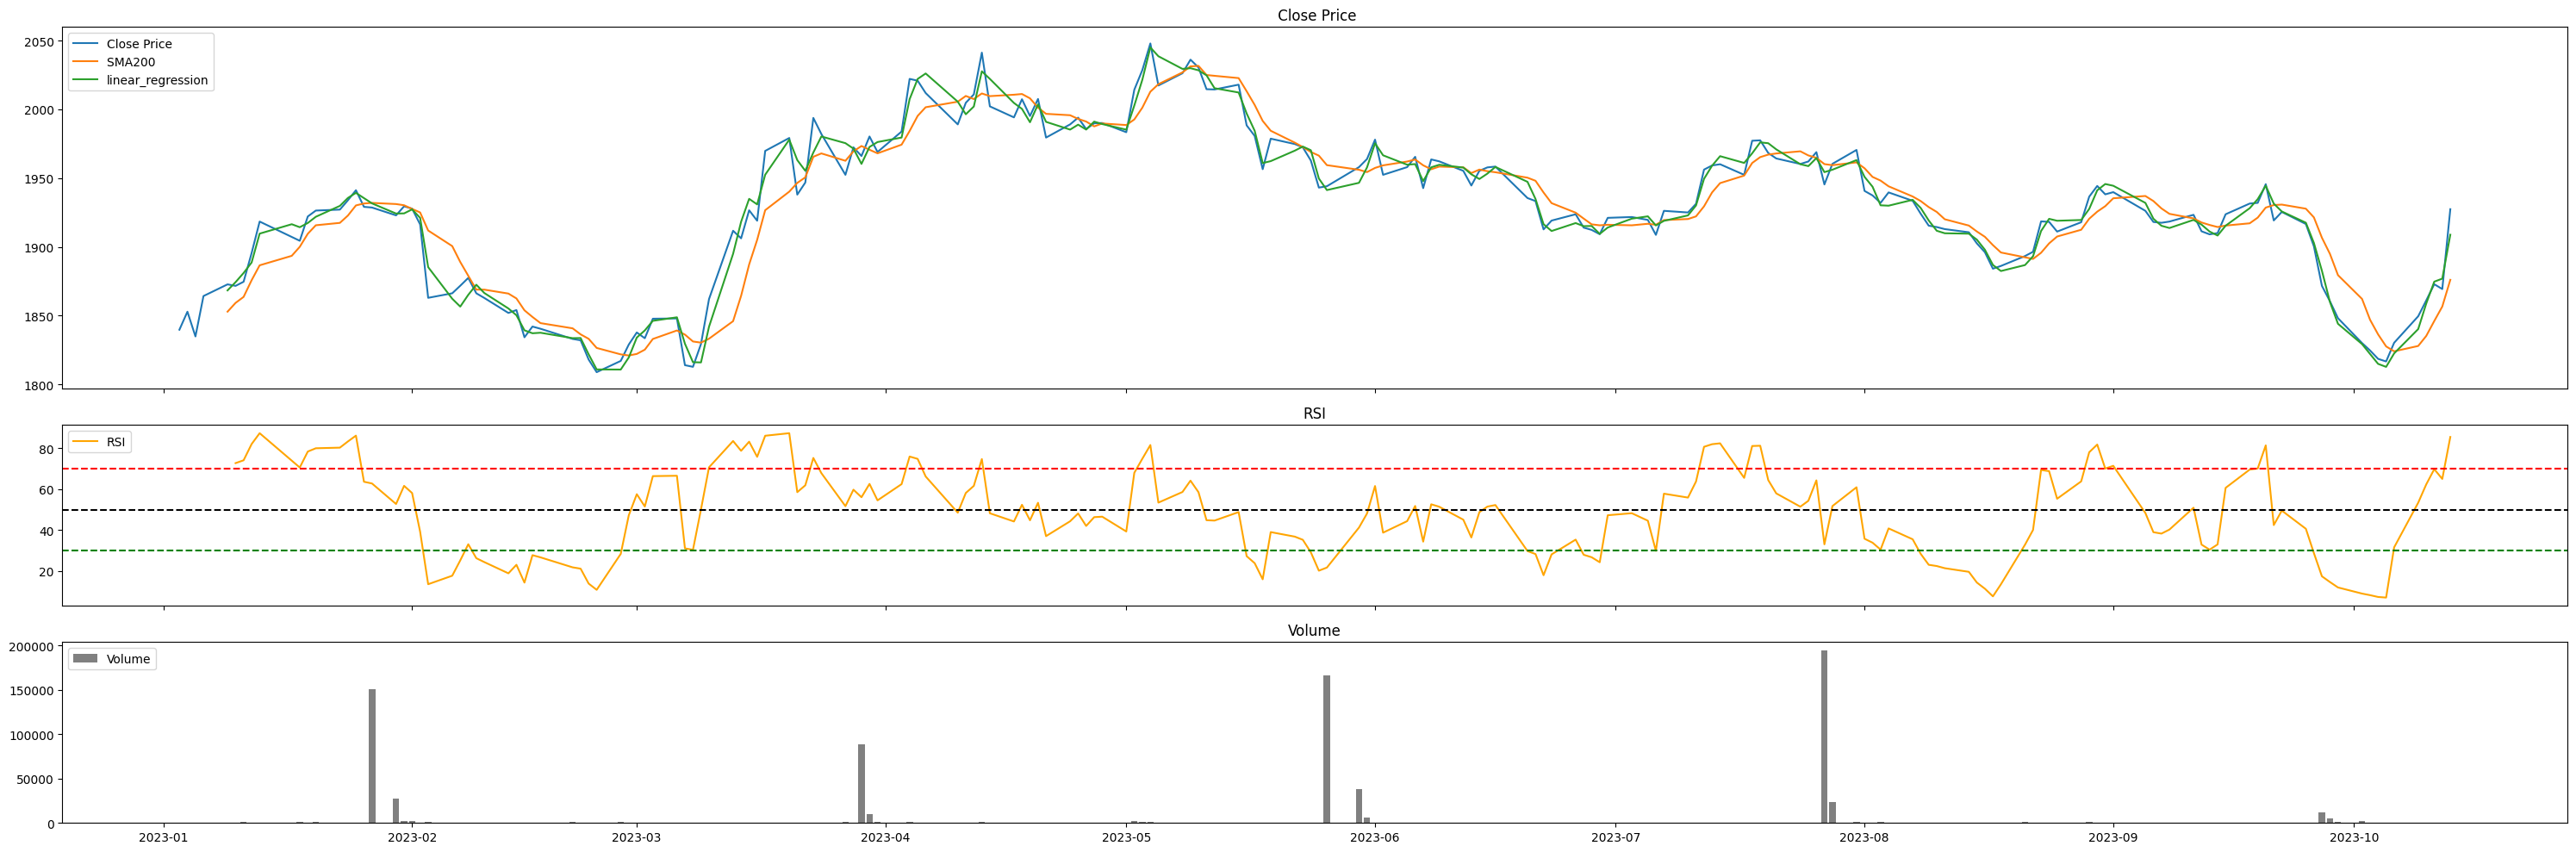

In [72]:
# Creazione delle sottotrame
fig, axs = plt.subplots(3, 1, gridspec_kw={"height_ratios":[2, 1,1]}, figsize=(30,10), sharex=True)

# Grafico dei prezzi di chiusura
axs[0].plot(data['Close'], label="Close Price")
axs[0].plot(data['SMA200'], label="SMA200 ")
axs[0].plot(data['linear_regression'], label="linear_regression")
axs[0].set_title(' Close Price')
axs[0].legend(loc="upper left")

# Grafico dell'RSI
axs[1].plot(data['RSI'], color="orange", label="RSI")
axs[1].axhline(70, color='red', linestyle='--')
axs[1].axhline(50, color='black', linestyle='--')
axs[1].axhline(30, color='green', linestyle='--')
axs[1].set_title('RSI')
axs[1].legend(loc="upper left")

# Grafico dei volumi
axs[2].bar(data.index, data['Volume'], color="gray", label="Volume")
axs[2].set_title('Volume')
axs[2].legend(loc="upper left")

# Mostra il grafico
plt.tight_layout()
plt.show()



In [73]:

macd, macd_signal, macd_hist = ta.MACDFIX(data['Close'], 5)



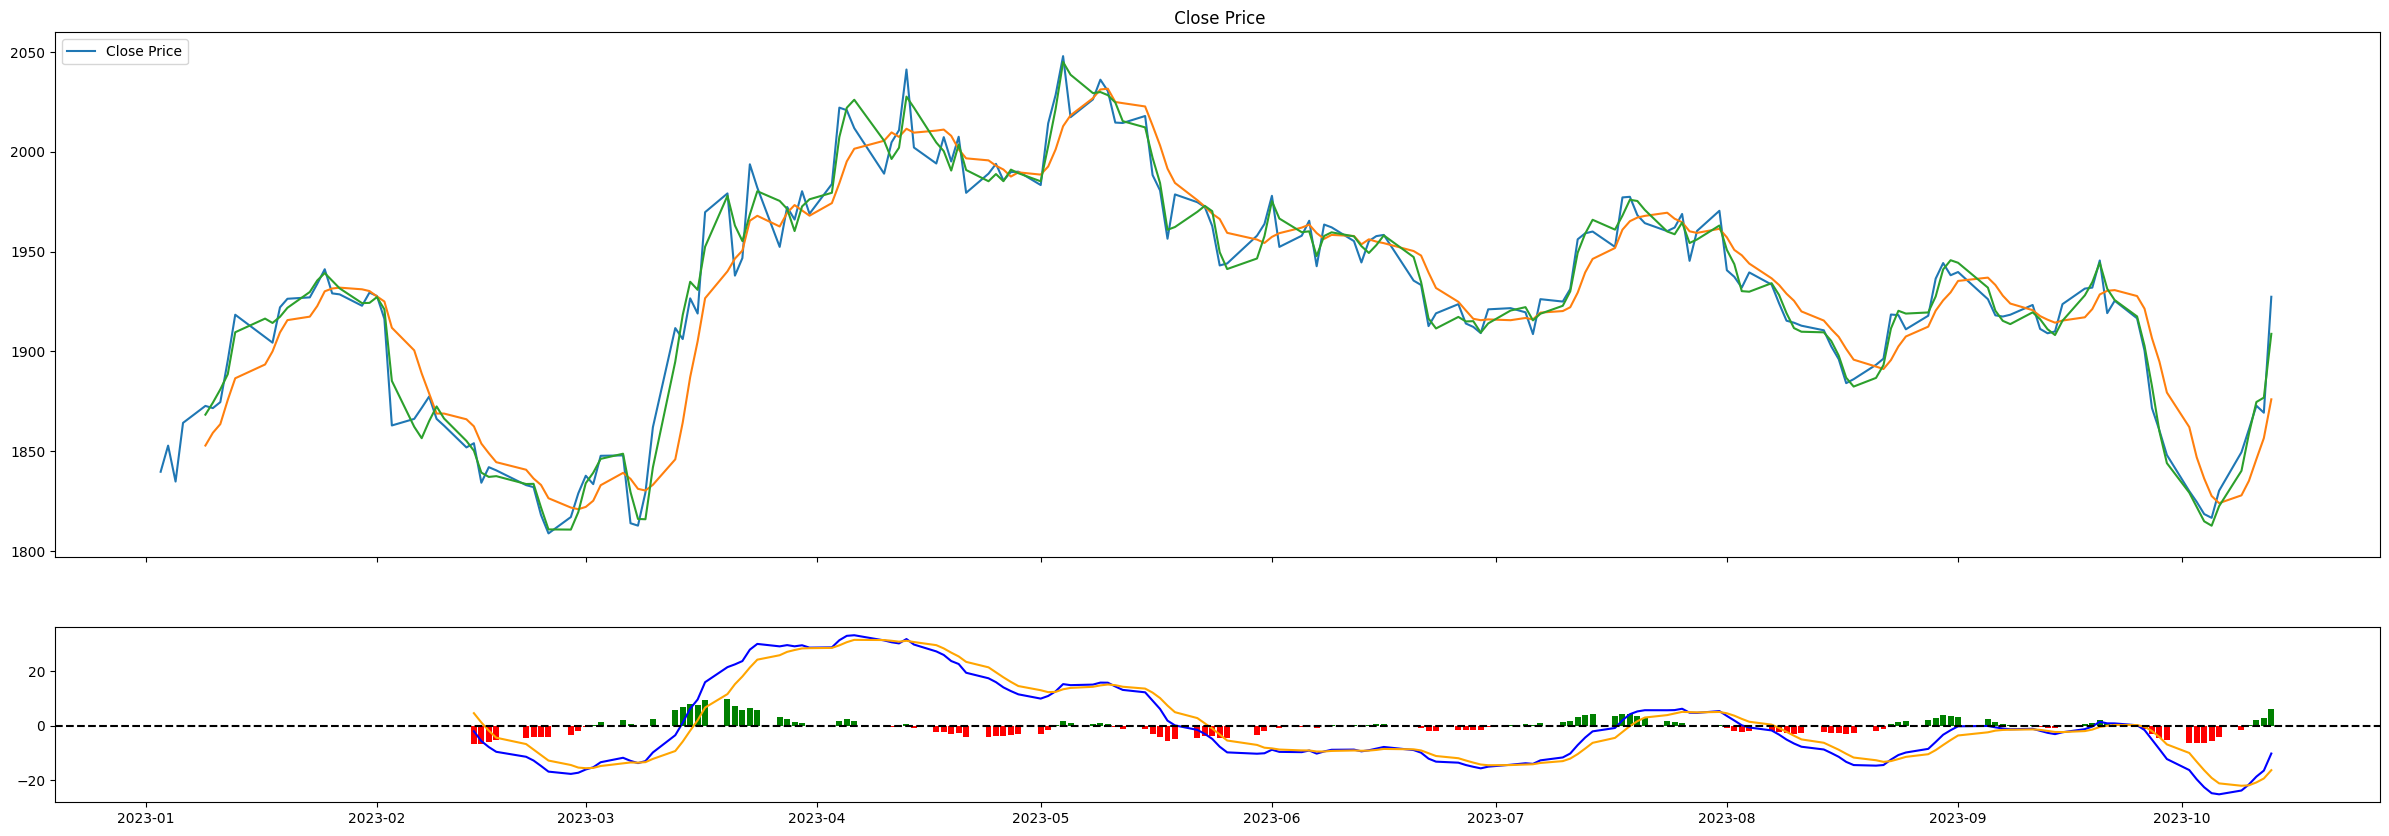

In [74]:
# Creazione delle sottotrame
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3, 1]}, figsize=(30,10), sharex=True)
c=['red' if cl < 0 else 'green' for cl in macd_hist]
# Grafico dei prezzi di chiusura
axs[0].plot(data['Close'], label="Close Price")
axs[0].plot(data['SMA200'])
axs[0].plot(data['linear_regression'])
axs[0].set_title(' Close Price')
axs[0].legend(loc="upper left")

# Grafico dell'RSI
axs[1].plot(macd,'b-')
axs[1].plot(macd_signal,color ='orange')
axs[1].bar(macd_hist.index , macd_hist, color = c)
axs[1].axhline(0, color='black', linestyle='--')


In [75]:
#ta.get_function_groups()

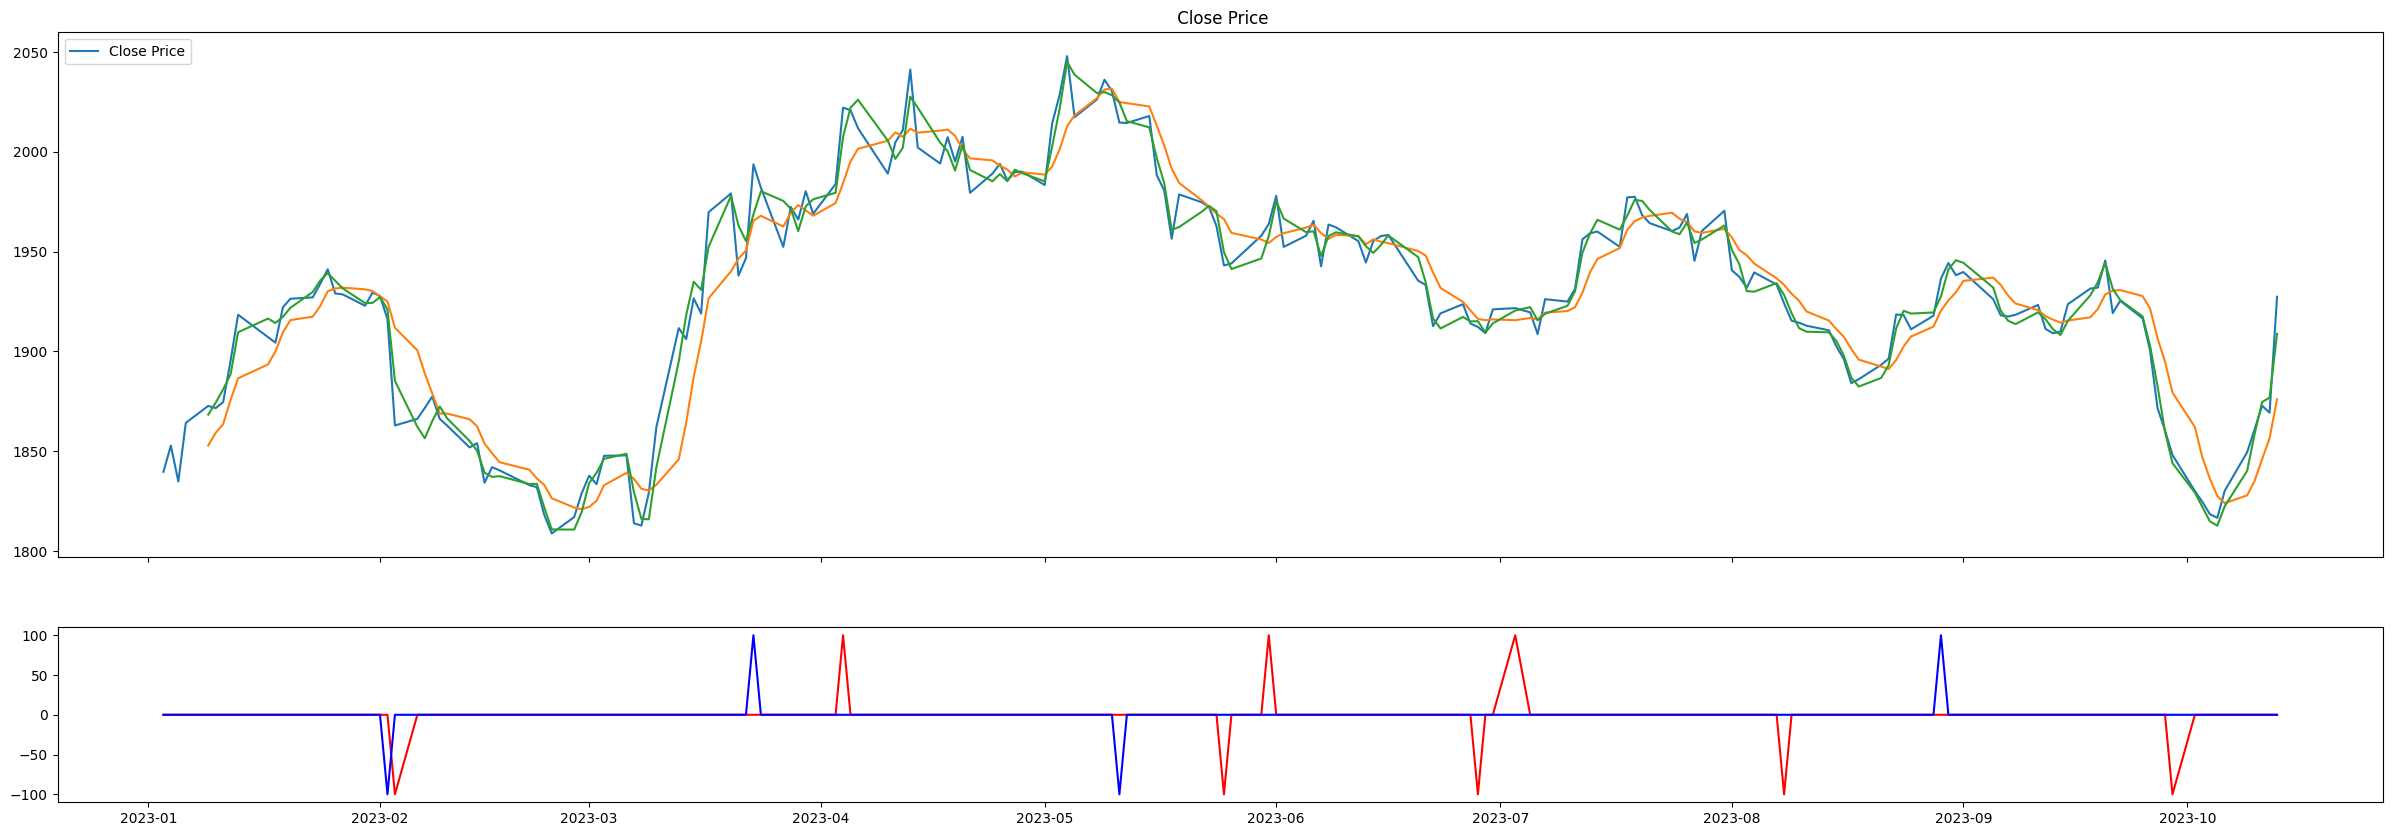

In [76]:
data['CDL3OUTSIDE'] = ta.CDL3OUTSIDE(data['Open'],data['High'], data['Low'], data['Close'] )
data['CDL3INSIDE'] =ta.CDL3INSIDE(data['Open'],data['High'], data['Low'], data['Close'] )

# Creazione delle sottotrame
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3, 1]}, figsize=(30,10), sharex=True)

# Grafico dei prezzi di chiusura
axs[0].plot(data['Close'], label="Close Price")
axs[0].plot(data['SMA200'])
axs[0].plot(data['linear_regression'])
axs[0].set_title(' Close Price')
axs[0].legend(loc="upper left")

# Grafico
axs[1].plot(data['CDL3OUTSIDE'],'r-')
axs[1].plot(data['CDL3INSIDE'],'b-')


In [77]:
df.columns=['Open', 'High', 'Low', 'Close','Adj Close', 'Volume']
#Check if NA values are in data
df=df[df['Volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
186,1844.099976,1845.900024,1826.699951,1830.000000,1830.000000,2309
187,1825.000000,1830.900024,1816.800049,1824.599976,1824.599976,310
188,1821.800049,1828.199951,1816.400024,1818.500000,1818.500000,357
189,1826.300049,1826.300049,1815.599976,1816.599976,1816.599976,393
190,1819.000000,1831.800049,1809.400024,1830.199951,1830.199951,390
191,1842.500000,1861.500000,1842.500000,1849.500000,1849.500000,232
192,1857.000000,1861.400024,1852.800049,1861.000000,1861.000000,236
193,1869.500000,1874.599976,1869.099976,1872.800049,1872.800049,65
194,1874.699951,1881.199951,1867.000000,1869.300049,1869.300049,46
195,1877.500000,1930.099976,1877.500000,1927.400024,1927.400024,46


In [78]:
def pivotid(df1, l, n1, n2): #n1 n2 before and after candle l
    if l-n1 < 0 or l+n2 >= len(df1):
        return 0

    pividlow=1
    pividhigh=1
    for i in range(l-n1, l+n2+1):
        if(df1.Low[l]>df1.Low[i]):
            pividlow=0
        if(df1.High[l]<df1.High[i]):
            pividhigh=0
    if pividlow and pividhigh:
        return 3
    elif pividlow:
        return 1
    elif pividhigh:
        return 2
    else:
        return 0

df['pivot'] = df.apply(lambda x: pivotid(df, x.name,10,10), axis=1)

pd.set_option('mode.chained_assignment', None)

df

,Open,High,Low,Close,Adj Close,Volume,pivot
0,1836.199951,1839.699951,1836.199951,1839.699951,1839.699951,29,0
1,1845.599976,1859.099976,1845.599976,1852.800049,1852.800049,25,0
2,1855.199951,1855.199951,1834.800049,1834.800049,1834.800049,24,0
3,1838.400024,1868.199951,1835.300049,1864.199951,1864.199951,26,0
4,1867.000000,1880.000000,1867.000000,1872.699951,1872.699951,62,0
...,...,...,...,...,...,...,...
191,1842.500000,1861.500000,1842.500000,1849.500000,1849.500000,232,0
192,1857.000000,1861.400024,1852.800049,1861.000000,1861.000000,236,0
193,1869.500000,1874.599976,1869.099976,1872.800049,1872.800049,65,0
194,1874.699951,1881.199951,1867.000000,1869.300049,1869.300049,46,0


In [79]:
def pointpos(x):
    if x['pivot']==1:
        return x['Low']-1e-3
    elif x['pivot']==2:
        return x['High']+1e-3
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [80]:
import plotly.graph_objects as go
from datetime import datetime

dfpl = df[-300:-1]

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                                     open=dfpl['Open'],
                                     high=dfpl['High'],
                                     low=dfpl['Low'],
                                     close=dfpl['Close'],
                                     increasing_line_color='green',
                                     decreasing_line_color='red')])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=9, color="MediumPurple"),
                name="pivot")

# Loop through pivot points and draw horizontal and vertical lines
for idx, row in dfpl.iterrows():
    if not np.isnan(row['pointpos']):  # assuming NaNs in 'pointpos' for non-pivot points
        # Horizontal Line
        fig.add_shape(type='line',
                      xref='x',
                      yref='y',
                      x0=idx,
                      y0=row['pointpos'],
                      x1=dfpl.index.max(),
                      y1=row['pointpos'],
                      line=dict(color="MediumPurple", width=1, dash="dot"))

        # Vertical Line
        fig.add_shape(type='line',
                      xref='x',
                      yref='paper',
                      x0=idx,
                      y0=0,
                      x1=idx,
                      y1=1,
                      line=dict(color="MediumPurple", width=1, dash="dot"))

        # Date annotation
        date_str = str(idx) if not isinstance(idx, datetime) else idx.date()
        fig.add_annotation(x=idx,
                           y=0.05,
                           yref='paper',
                           text=date_str,
                           showarrow=False,
                           font=dict(color="MediumPurple", size=10))

fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(paper_bgcolor='black', plot_bgcolor='black')

fig.show()




Number of bins: 5278


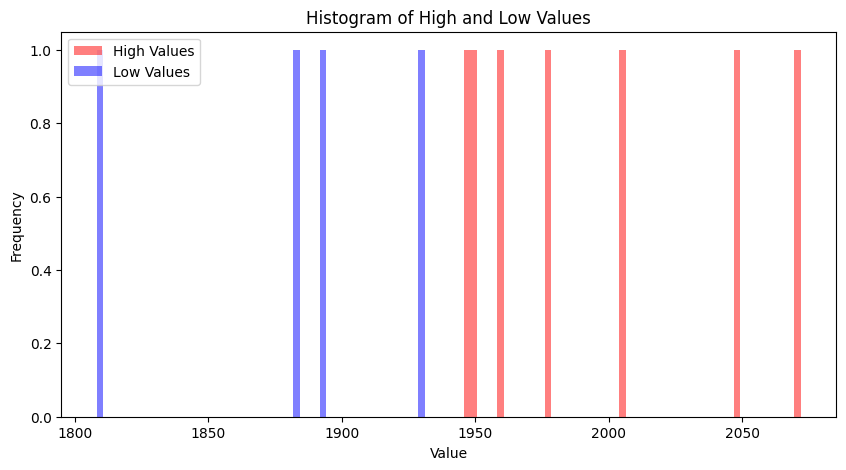

In [81]:
# Filter the dataframe based on the pivot column
high_values = df[df['pivot'] == 2]['High']
low_values = df[df['pivot'] == 1]['Low']

# Define the bin width
bin_width = 0.05  # Change this value as needed

# Calculate the number of bins
bins = int((high_values.max() - low_values.min()) / bin_width)

# For troubleshooting, print the number of bins
print(f"Number of bins: {bins}")

# Set a fixed number of bins for testing
bins = 50  # for troubleshooting

# Create the histograms
plt.figure(figsize=(10, 5))
plt.hist(high_values, bins=bins, alpha=0.5, label='High Values', color='red')
plt.hist(low_values, bins=bins, alpha=0.5, label='Low Values', color='blue')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of High and Low Values')
plt.legend()
plt.show()